In [1]:
%matplotlib inline

'''
Use %matplotlib inline instead of %matplotlib widget when preparing the final report. 
Otherwise the images are, unfortunately, not embedded in the pdf. 
'''
from importstatements import *
css_styling()

$
\newcommand{\fsamp}{{F_s}}
\newcommand{\unit}[1]{\mathrm{\,#1}}
\newcommand{\tmidx}{n}
\newcommand{\tds}[2][\tmidx]{{#2(#1)}}
\newcommand{\matcmd}[2][(\cdot)]{\texttt{#2}#1}
\renewcommand{\matcmd}[2][(\cdot)]{\mathrm{#2}#1}
\newcommand{\fcn}[1]{{\text{#1}}}
\newcommand{\bigcb}[1]{{\big\{#1\big\}}} 
\newcommand{\Bigcb}[1]{{\Big\{#1\Big\}}}
\newcommand{\bigsb}[1]{{\big[#1\big]}} 
\newcommand{\Bigsb}[1]{{\Big[#1\Big]}}
\newcommand{\biggsb}[1]{{\bigg[#1\bigg]}}
\newcommand{\pyt}{\matcmd[]{Python}}
$

# Basic concepts of continuous- and discrete-time signal processing

The goal of this exercise is to gain practical insights into fundamental signal processing concepts such as signal _sampling_, aliasing, windowing and the Fourier transform. These methods and concepts are commonly applied in medical signal and image analysis and a good understanding of these basics is essential  required. For more information on these concepts, check the course slides and notes.

## Required modules

During this practical session, the following libraries will be used:

- `numpy`
- `matplotlib`
- `scipy`

To import any external library, you need to import it using the **`import`** statement followed by the name of the library (e.g. `import numpy as np`). These imports have already been done for you in the code segment above. Please refer to the `importstatements.py` file related to _this_ project for examples. Further projects will come with their own `importstatements.py` function, where only the typical packages required for _that_ project will be imported. This will help preserve the modularity of the notebook.

## Exercise: Sampling and the discrete Fourier transform

Consider a sine wave signal with frequency $F=2\unit{Hz}$ and a length of $1\unit{s}$. Sample the signal with a sampling frequency $\fsamp=128\unit{Hz}$.

<div class="alert alert-info">

**Task**  
    
- Generate the sampled signal. Call it $x$.
- Plot the sampled signal (use discrete points '*') against time. Label the x-and y-axes clearly. You can define the time axis with the functions [`arange`][arg]. Please click on the function name to see the corresponding documentation. Please read it _carefully_ to understand the outputs they produce.
- Additional help with plot is available in the documentation of Matplotlib. An link to [`xlabel`][xlabel] is included, you can look up similarly for `ylabel`, `title` etc.
- Similarly, look up documentation for the different plotting styles. [This][pltstyle] may be a quick (unofficial) reference.
</div>

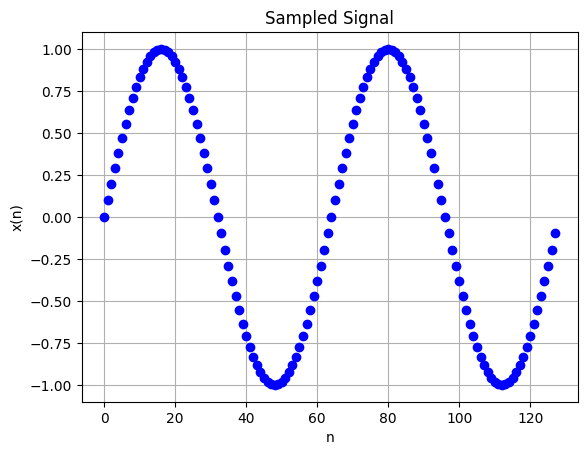

In [2]:
# Include code for the above task here. Define variables clearly and unambiguously.
fs = 128
F = 2
T = 1.0 # Time in seconds.
nTs = np.arange(0,T,1/fs) # Defining the sampling time instants for T seconds.
x =  np.sin(F*2*np.pi*nTs)                      # Define the sine signal based on nTs.

# Below is a template to plot the signal
fig = plt.figure(); fig.clf()
axSignal = fig.add_subplot(111)
axSignal.plot(range(0,x.size),x,'bo') # Plot the sampled signal ... 
                       # see documentation to plot as discrete points

# use xlabel and ylabel to add the correct labels.
plt.xlabel('n')
plt.ylabel('x(n)')
# use title to add a nice title to the plot.
plt.title('Sampled Signal')
# also look up how to add a grid to the plot. 
plt.grid()

plt.show()


Now we shall perform the spectral decomposition of this signal. As we have seen, spectral decomposition is the process by which a signal can be expressed as the sum of sinusoids with different frequencies (spectrum). For discrete-time (sampled) signals, we use the discrete Fourier transform (DFT) for the spectral decomposition. The DFT is optimally implemented using the _fast_ Fourier transform, usually termed the FFT. Note that, for a real-valued signal, the DFT yields a complex valued spectrum containing the _phase_ and the _magnitude_ of each frequency component.

<div class="alert alert-info">

**Task**
    
- Calculate the DFT of `x` using functions [`fft.fft`][fft] and plot the magnitude of the DFT. Use the functions [`np.abs`][abs] and [`fft.fftfreq`][ffreq] for this. 
- Plot the magnitude spectrum with the frequency variable along the x-axis. _Clearly_ label and limit the axes
    
*Hint* You may need the [`fftshift`][fshift] function during plotting to obtain easily interpretable results.
</div>

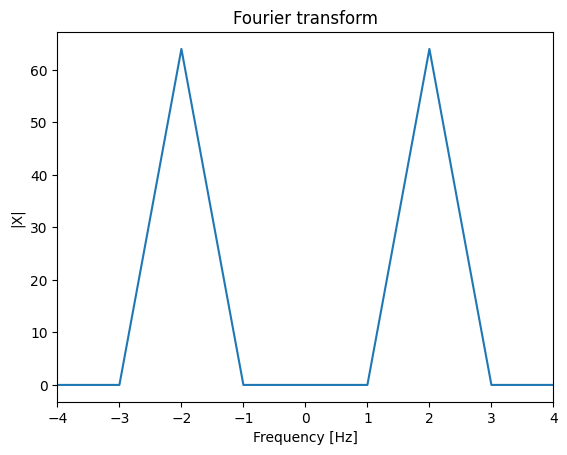

In [3]:
# Include your code here. A template is provided
X = fft.fft(x)
f = fft.fftfreq(x.size, 1/fs)
fshift = fft.fftshift(f)
Xshift = fft.ifftshift(X)

# Below is a template to plot the magnitude spectrum
fig = plt.figure(); fig.clf()
axMagnitude = fig.add_subplot(111)
axMagnitude.plot(fshift, np.abs(Xshift)) # Plot the magnitude spectrum
axMagnitude.set_xlabel('Frequency [Hz]')
axMagnitude.set_ylabel('|X|')
axMagnitude.set_xlim(-4,4)
plt.title('Fourier transform')
plt.show()


<div class="alert alert-info">
    
**Task** 

From the DFT analysis of your signal answer the following
    
- Where do you see the frequency of the generated pure tone? 
- Is this what you expect?

Please answer in the cell below.
</div>

<div class="alert alert-success">
<span style="color:black">

    
* Please ignore the above tags and markup script. 
* Please enter your answer/explanation here. 
* Please do not remove the tags above and below. Use `Markdown` mode for this cell. 
* You may use \LaTeX formatting if you require to insert any mathematical formulae (e.g. $x_1=\sin(2\pi f t)$).

Note that this only applies to the cells where a textual answer/analysis is required.

<span style="color:blue">

The analytical approuch gives insight into the numerical results. First consider the Fourier transform (FT) of a signal $x(t)$ $$\mathcal{F}[x(t)](f)=X(f) = \int_{-\infty}^{\infty}x(t)e^{-j2\pi ft}dt.$$
To derive the FT of a sine function one needs to know the FT of a complex exponential. Substitute in the FT the signal $x(t)=e^{j2\pi Ft}$ 
\begin{align} 
    X(f) &= \int_{-\infty}^{\infty}e^{j2\pi t (F-f)}dt\\
    &= \frac{1}{2\pi}\int_{-\infty}^{\infty}e^{j2\pi t (F-f)}d(2\pi t)\\
    &= \delta(F-f) = \delta(f-F)
\end{align}
In the last step the integral definition of the delta Dirac function was used. Now remember that the a sine wave can be written in its euler form $$\sin(2\pi Ft) = \frac{e^{j2\pi Ft}-e^{-j2\pi Ft}}{2j}.$$ Hence the FT of the sine function is $$\mathcal{F}[\sin(t)](f) = \frac{1}{2j}(\delta(F-f)-\delta(F+f)).$$
So the expected amplitude specturm shows two delta Dirac peaks on the frequencies $F$ and $-F$. <br>
For the given pure tone the peaks of the spectrum are located at its frequencies, i.e. $\pm 2\unit{Hz}$, but instead of two delta Dirac peaks two triangles can be seen. This is due to the discrete character of the signal. The dirac Delta function is a theoretical result and is only approximated in practice.

## Exercise: Sampling and Nyquist Frequency
We shall now investigate the effect of sampling and _aliasing_. For this we shall consider an underlying (continuous-time) signal that consists of the sum of $K=4$ different sinusoids. Each sinusoidal component $k$ is given by the general equation $A_k \sin\big(2 \pi f_k t\big)$. The $A_k$ and $f_k$ are as follows:

- $A_1 = 0.3$, $f_1=10\unit{Hz}$
- $A_2 = 0.4$, $f_2 = 30\unit{Hz}$
- $A_3 = 0.5$, $f_3 = 50\unit{Hz}$
- $A_4 = 0.2$, $f_4 = 80\unit{Hz}$

<div class="alert alert-info">
    
**Task** 

What constraint should the sampling frequency $\fsamp$ satisfy for correctly sampling this signal?
Please answer in the cell below.
</div>

<div class="alert alert-success">
<span style="color:black">

    
Your answer/explanation here. Please do not remove the tags above and below. Use `Markdown` mode for this cell. 

<span style="color:blue">

According to the Nyquist-Shannon sampling theorem, the sampling Frequency should be at least twice the highest frequency present in the signal in order to correctly sample a signal. Therefore, since this given analogue signal contains 80Hz at most, we should sample at least at a sample rate of 160Hz.

Now consider that we observe this analogue signal for a duration of $5\unit{s}$. 

<div class="alert alert-info">
    
**Task** 

Assume the sampling frequency is $\fsamp=200\unit{Hz}$.    

- Plot the sampled signal (use continuous line for the plotting, not discrete points). Label the axes correctly and _clearly_. 
- Compute and plot the amplitude spectrum of this signal using the DFT
- Based on these plots, is the spectrum what you expect to see?     
</div>

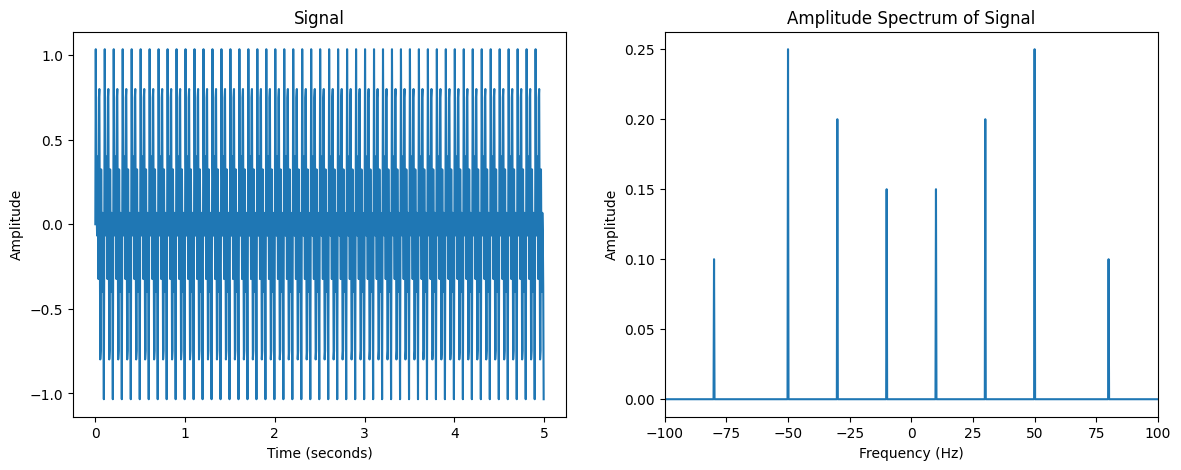

In [9]:
# Please write your code to generate the sampled signal and the requested plots here.
A = [0.3,0.4,0.5,0.2]
F = [10,30,50,80]
Fs = 200

# Create time vector
t = np.linspace(0, 5, 5 * Fs, endpoint=False)

# Create signal by summing four sine waves
x = np.zeros_like(t)
for i in range(len(A)):
    x += A[i] * np.sin(2 * np.pi * F[i] * t)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,5))

# Plot the signal
ax1.plot(t, x)
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Signal')

# Compute DFT of signal
freqs = fft.fftfreq(x.size, 1/Fs)
X = fft.fft(x)

# Shift the spectrum to make it symmetric
X = fft.ifftshift(X)
freqs = fft.fftshift(freqs)

# Plot the amplitude spectrum with limited frequency range
ax2.plot(freqs, np.abs(X/x.size))
ax2.set_xlim([-100, 100])
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
ax2.set_title('Amplitude Spectrum of Signal')
plt.show()

<div class="alert alert-success">
<span style="color:black">

Your answer/explanation here. Please do not remove the tags above and below. Use `Markdown` mode for this cell. 

<span style="color:blue">

This is expected! The peaks indicate the frequencies present in the signal and the maginude corresponds to the amplitude that is given to that frequency. (higher amplitudes indicates a more dominant freqcueny in the signal)

<div class="alert alert-info">
    
**Task** 

Now, assume the analogue signal was sampled at a sampling frequency of $\fsamp=100\unit{Hz}$.    

- Plot the sampled signal (use continuous line for the plotting, not discrete points). Label the axes correctly and _clearly_. 
- Compute and plot the amplitude spectrum of this signal using the DFT
- Based on these plots, explain the spectrum you obtain.
- Previously you defined the 3rd sinusiod as $A_3\sin(2\pi F_3t)$. How does the spectrum you obtain change if you design this as $A_3\cos(2\pi F_3t)$? Can you explain the difference?
</div>
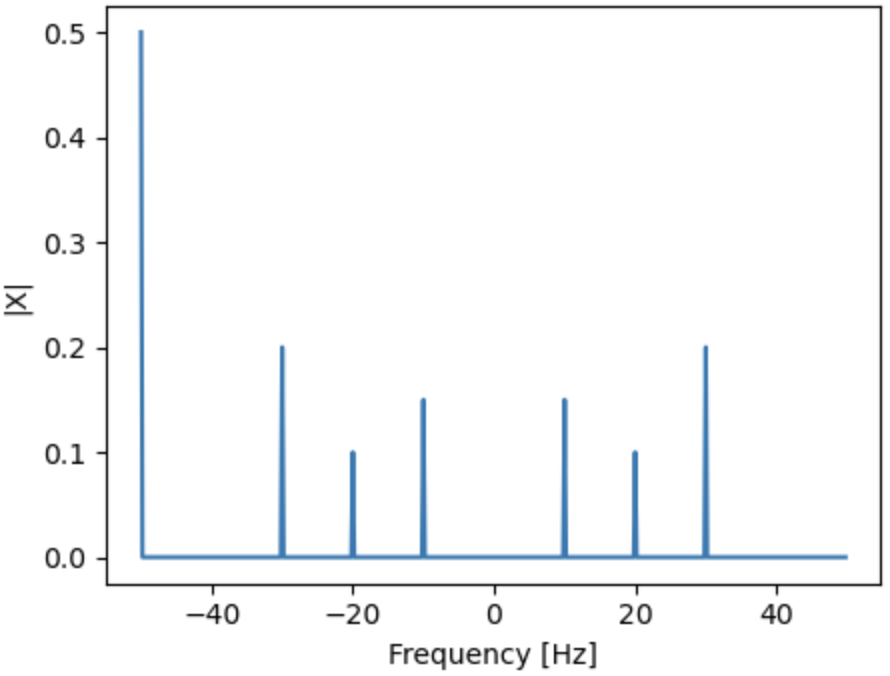
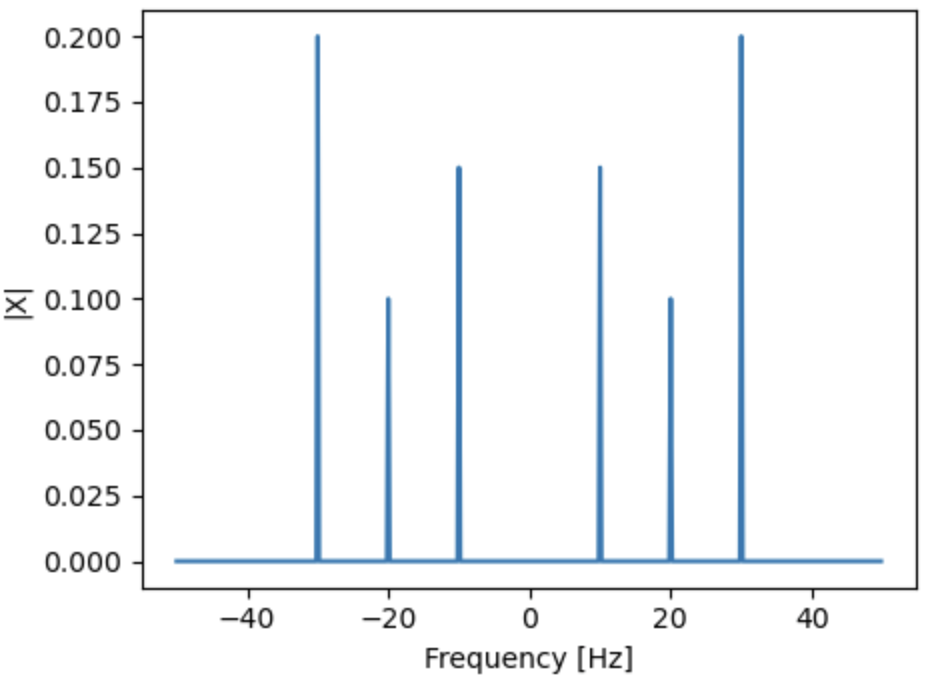

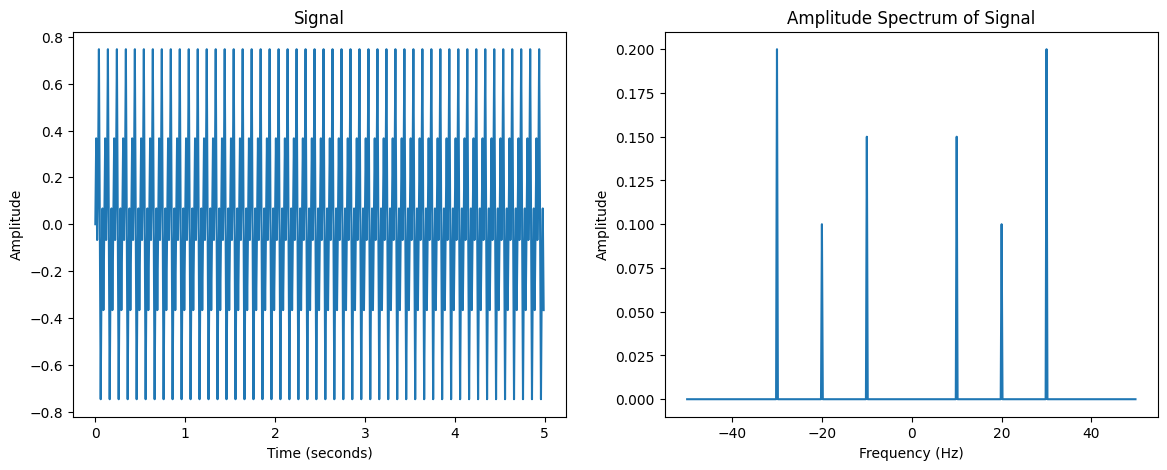

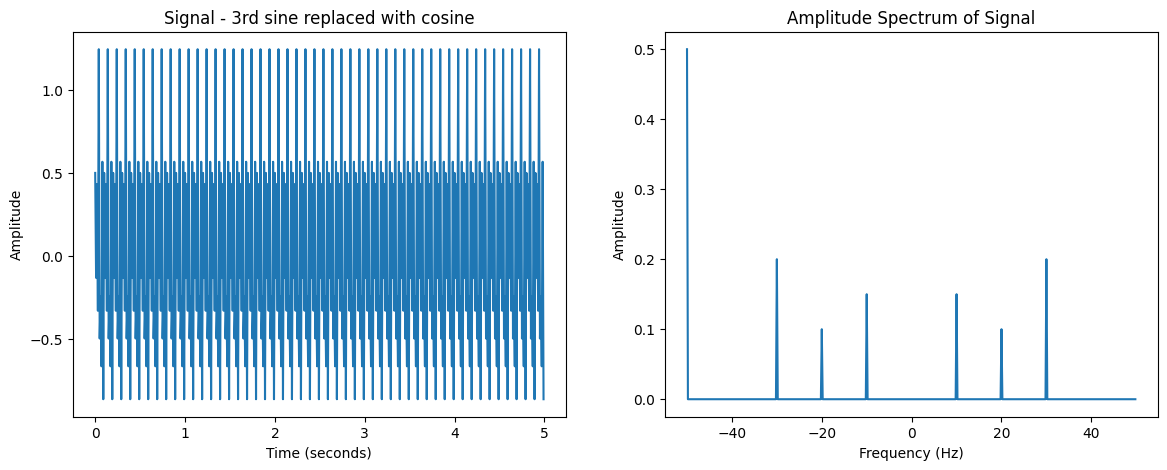

In [14]:
# Please write your code to generate the sampled signal and the requested plots here.
# Please write your code to generate the sampled signal and the requested plots here.
A = [0.3,0.4,0.5,0.2]
F = [10,30,50,80]
Fs = 100

# Create time vector
t = np.linspace(0, 5, 5 * Fs, endpoint=False)

# Create signal by summing four sine waves
x = np.zeros_like(t)
for i in range(len(A)):
    x += A[i] * np.sin(2 * np.pi * F[i] * t)

# Compute DFT of signal
freqs = fft.fftfreq(x.size, 1/Fs)
X = fft.fft(x)

# Shift the spectrum to make it symmetric
X = fft.ifftshift(X)
freqs = fft.fftshift(freqs)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,5))

# Plot the signal
ax1.plot(t, x)
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Signal')

# Plot the amplitude spectrum with limited frequency range
ax2.plot(freqs, np.abs(X/x.size))
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
ax2.set_title('Amplitude Spectrum of Signal')
plt.show()

# signal with cosine
x = np.zeros_like(t)
for i in range(len(A)):
    if i == 2:
        x += A[i] * np.cos(2 * np.pi * F[i] * t)
    else:
        x += A[i] * np.sin(2 * np.pi * F[i] * t)
    

# Compute DFT of signal
freqs = fft.fftfreq(x.size, 1/Fs)
X = fft.fft(x)

# Shift the spectrum to make it symmetric
X = fft.ifftshift(X)
freqs = fft.fftshift(freqs)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,5))

# Plot the signal
ax1.plot(t, x)
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Signal - 3rd sine replaced with cosine')

# Plot the amplitude spectrum with limited frequency range
ax2.plot(freqs, np.abs(X/x.size))
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
ax2.set_title('Amplitude Spectrum of Signal')
plt.show()

<div class="alert alert-success">
<span style="color:black">
    
Your answer/explanation here. Please do not remove the tags above and below. Use `Markdown` mode for this cell. 

<span style="color:blue">

Writing the signal after sampling with a sample rate of $100\unit{Hz}$ yields $$x(n) = 0.3\sin(2\pi \frac{10}{100}n) + 0.4\sin(2\pi \frac{30}{100}n) + 0.5\sin(2\pi \frac{50}{100}n) + 0.2\sin(2\pi \frac{80}{100}n).$$
First note that the third sine wave disappears: $$\sin(2\pi \frac{50}{100}n)=\sin(2\pi \frac{1}{2}n) = \sin(\pi n) = 0, \:\:\: \forall n \in \mathcal{Z}$$
This explains why the peaks at $\pm50\unit{Hz}$ disappears in the spectrum. Secondly the fourth sine function becomes an alias for a sine wave with frequency $20\unit{Hz}$: $$\sin(2\pi \frac{80}{100}n) = \sin(2\pi n - 2\pi \frac{20}{100}n) = -\sin(2\pi \frac{20}{100}n),$$ which explains why the peaks at $\pm 80\unit{Hz}$ disappears and new peaks arise at $\pm 20\unit{Hz}$.<br>
When replacing the third sine with a cosine the third component of the sampled signal becomes $$\cos(2\pi \frac{50}{100}n)=\cos(2\pi \frac{1}{2}n) = \cos(\pi n) = (-1)^n.$$ Taking the analytical approuch one can use the euler form for the cosine given as $$\cos(2\pi F t) = \frac{e^{j2\pi Ft}+e^{-j2\pi Ft}}{2}$$
to easily derive its FT $$\mathcal{F}[\cos(2\pi f t)] = \frac{1}{2}(\delta(F-f)+\delta(F+f)).$$ This analytical view shows that there should be two peaks on $\pm 50\unit{Hz}$ which is not the case. Only one peak on $-50\unit{Hz}$ occurs in the spectrum. This is due to the fact that only the amplitude spectrum in the interval $[-50\unit{Hz},50\unit{Hz})$ is displayed which is a result of taking a sample frequency of $100\unit{Hz}$, the lenght of the interval.

## Exercise: Spectral decomposition and zero-padding

We shall now see what happens when we compute the DFT of the same signal, but for different durations. For this, we will recreate the analogue signal of the previous exercise and consider it is sampled at $\fsamp=200\unit{Hz}$. 

<div class="alert alert-info">
    
**Task** 

- Generate two versions of the sampled signal: one with a duration of 1 second and one which has a shorter duration (e.g. 0.35 s).
- Compute and plot the amplitude spectrum of these signals using the DFT
- Based on these plots, explain the difference you observe between the DFT magnitude spectrum of the shorter and longer signal.
</div>

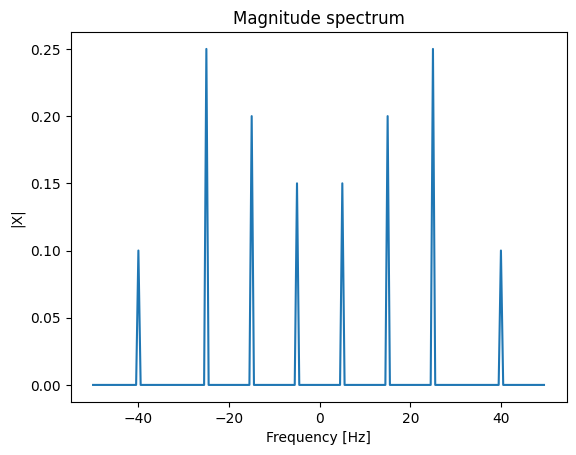

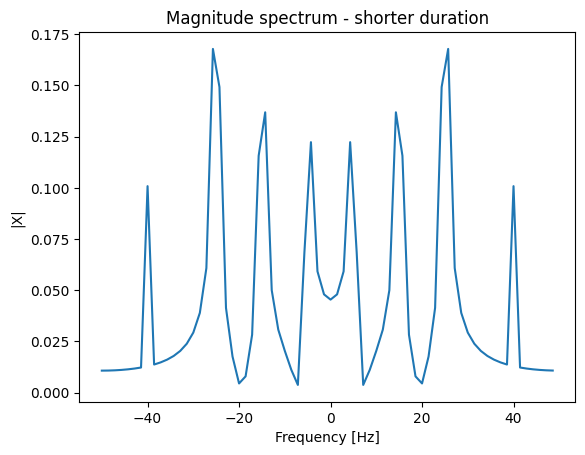

In [18]:
def spectrum(x,fs,lim=None,plot=True,title='Magnitude spectrum'):
    # Compute DFT of signal
    freqs = fft.fftfreq(x.size, 1/Fs)
    X = fft.fft(x)
    # Shift the spectrum to make it symmetric
    X = fft.ifftshift(X)
    freqs = fft.fftshift(freqs)
    if plot: 
        fig = plt.figure(); fig.clf()
        axMagnitude = fig.add_subplot(111)
        axMagnitude.plot(freqs,np.abs(X/x.size))
        axMagnitude.set_xlabel('Frequency [Hz]')
        axMagnitude.set_ylabel('|X|')
        axMagnitude.set_title(title)
        if lim != None:
            axMagnitude.set_xlim(lim)
        plt.show()
        
    return X,freqs,np.abs(X)/len(x)

# Write your code here
# Some templates are suggested for you
fs = 200
Tlong = 1.
Tshort = 0.35
nTslong = np.arange(0,Tlong*fs)/fs # Defining the sampling time instants for T seconds.
nTsshort = np.arange(0,Tshort*fs)/fs # Defining the sampling time instants for T seconds.
xlong = np.zeros_like(nTslong)
for i in range(len(A)):
    xlong += A[i] * np.sin(2 * np.pi * F[i] * nTslong)
xshort = np.zeros_like(nTsshort)
for i in range(len(A)):
    xshort += A[i] * np.sin(2 * np.pi * F[i] * nTsshort)

Xlong, freqlong, amplong = spectrum(xlong,fs)
Xshort, freqshort, ampshort = spectrum(xshort,fs,title='Magnitude spectrum - shorter duration')

<div class="alert alert-success">
<span style="color:black">
    
Your answer/explanation here. Please do not remove the tags above and below. Use `Markdown` mode for this cell. 

<span style="color:blue">
The minimal frequency difference of this signal is 20 Hz. When only 0.35s of the signal is used, less datapoints are taken into account, which results in a smaller resolution. The resolution of the first signal is small enough to resolve all spectrum peaks, but in the second case, the spectrum is more smeared out.

$$N_{s(long)} = 1.0[s] * 200[1/s] = 200 \unit{data  points}$$
$$N_{s(short)} = 0.35[s] * 200[1/s] = 70  \unit{data  points}$$

Next, we shall artificially increase the signal length of the shorter signal by appending zeros to the end of the sequence. This is termed as _zero-padding_. 

This can be easily done by adding the `n` argument in the `fft` function. Alternatively, in the time-domain you can use the `np.zeros` function to create a vector of zeros which you can append to the signal vector to get a zero-padded sequence of the desired length. We shall now investigate the influence of zero-padding on the spectral representation/decomposition of the signal.

<div class="alert alert-info">
    
**Task** 

- Zero-pad the shorter signal so that the zero-padded sequence has lenghts of $0.5\unit{s}$, $0.75\unit{s}$ and $1\unit{s}$.
- Compute and plot the amplitude spectra of these zero-padded signals using the DFT
</div>


/home/codespace/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


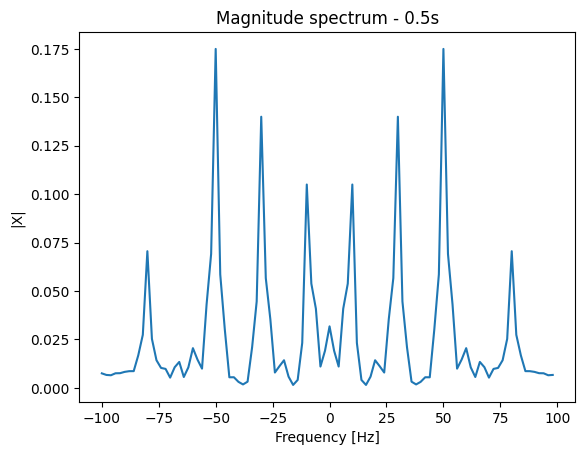

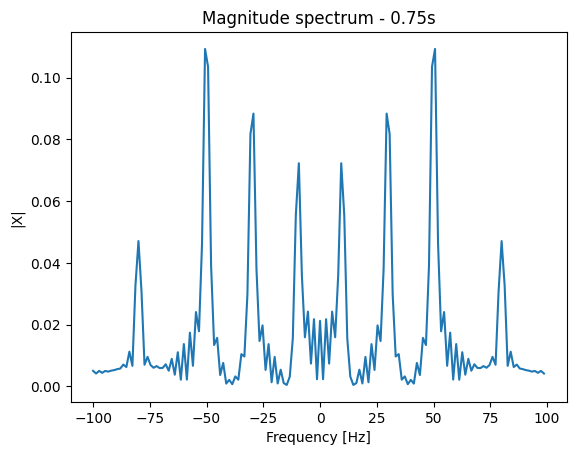

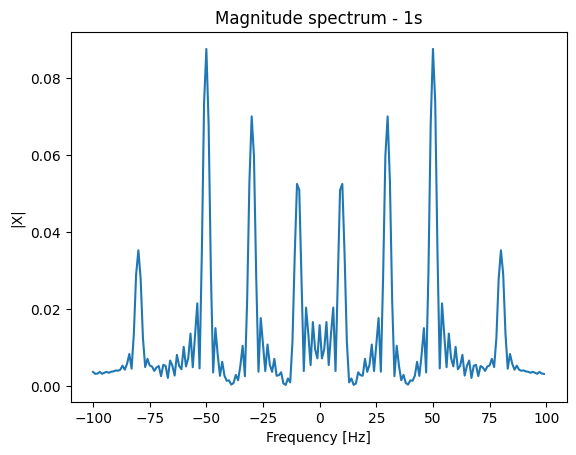

In [9]:
fs = 200
x1 = np.concatenate((xshort, np.zeros(int(len(xlong)/2)-len(xshort))))
x2 = np.concatenate((xshort, np.zeros(int(len(xlong)*3/4)-len(xshort))))
x3 = np.concatenate((xshort, np.zeros(len(xlong)-len(xshort))))

X1,freq1,amp1 = spectrum(x1,fs,title='Magnitude spectrum - 0.5s')
X2,freq2,amp2 = spectrum(x2,fs,title='Magnitude spectrum - 0.75s')
X3,freq3,amp3 = spectrum(x3,fs,title='Magnitude spectrum - 1s')

<div class="alert alert-info">
    
**Task** 

Based on these plots, answer the following questions:

- Compare the spectrum obtained after zero-padding to the amplitude spectrum of the longer sequence (`Xlong`) and the amplitude spectrum of the non-zero-padded short sequence. What do you observe?
- What can be a benefit of using zero-padding? 
- If you are recording a biomedical, cortical EEG signal and you require a resolution of 1 Hz to identify the energy in the alpha band of 5 Hz, what should the minimum duration of your EEG recording window be?
</div>


<div class="alert alert-success">
<span style="color:black">
    
Your answer/explanation here. Please do not remove the tags above and below. Use `Markdown` mode for this cell. 

<span style="color:blue">

The padded signal results in a spectrum with the same recognizable peaks, but there are a lot more distortions present.
Zero-padding allows one to visualize the underlying spectra of signals when the amount of data points is spare.<br>

For the last question we have 
$$ \frac{F_s}{n} = 1 \unit{Hz}= \frac{5 \unit{Hz}}{5 \unit{Hz} \cdot T}$$

Hence the minimal duration of the EEG recording should be 1 second.

## Exercise: Windowing and spectrogram

Thus far we should have had no issues with plottig the spectra and observing the frequency components at the expected locations. This was because the signal durations were usually chosen to be a complete number of periods of the underlying sinusoids. Now we shall examine what happens when this is not the case and what to do in such situations.

<div class="alert alert-info">
    
**Task** 

- Make a signal $x_1$ which is the sum of two sine function of frequencies $F_1 = 10\unit{Hz}$ and $F_2 = 20\unit{Hz}$. The duration of the signal is $0.5\unit{s}$ and $\fsamp=1000\unit{Hz}$. 
- Calculate the DFT and plot the amplitude spectrum of this signal.
- Now generate another signal (call it $x_2$), which has the same frequencies as above, but with a length of $0.511\unit{s}$. 
- Compute and plot the magnitude spectrum of this signal and compare it to spectrum of the previous case.
- What do you observe? What could give rise to this effect? **Tip:** Plot the time domain signal in each case. Does this give you any ideas? 

</div>

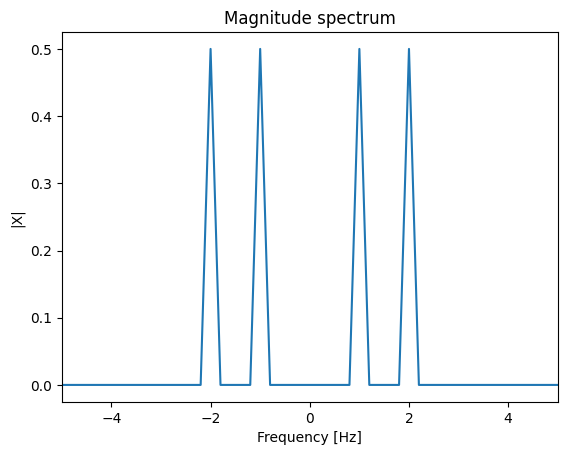

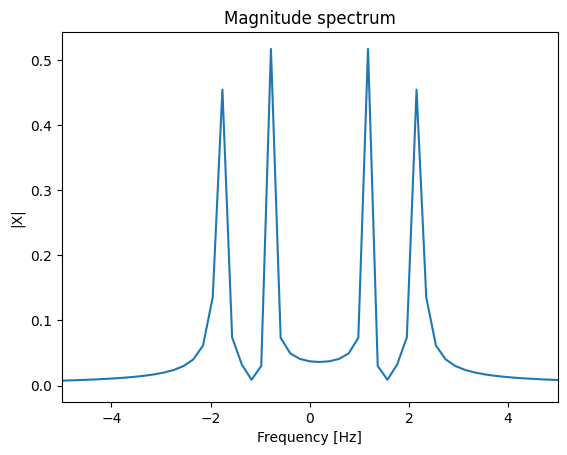

In [23]:
#your code for signal analysis and plotting goes here
f1 = 10
f2 = 20
T1 = 0.5
fs = 1000
nTs1 = np.arange(0,T1*fs)/fs
x1 = np.cos(2*np.pi*f1*nTs1) + np.cos(2*np.pi*f2*nTs1)
X1,freq1,amp1 = spectrum(x1,fs,lim=[-5,5])
T2 = 0.511
nTs2 = np.arange(0,T2*fs)/fs
x2 = np.cos(2*np.pi*f1*nTs2) + np.cos(2*np.pi*f2*nTs2)
X2,freq2,amp2 = spectrum(x2,fs,lim=[-5,5])

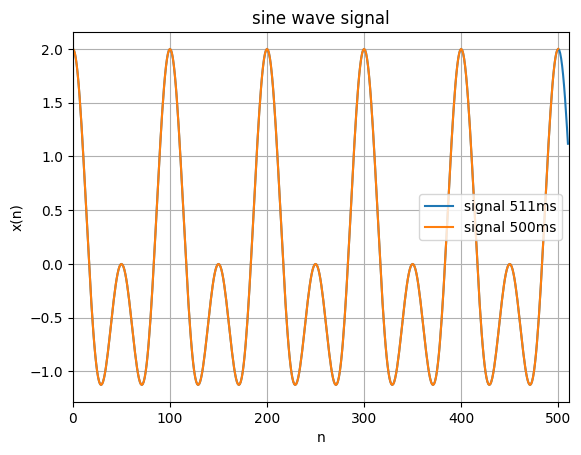

In [24]:
# time domain

fig = plt.figure(); fig.clf()
axSignal = fig.add_subplot(111)
axSignal.plot(range(0,x2.size),x2,range(0,x1.size+1),x2[:501])
#axSignal.axvline(x=500,color='r')
axSignal.set_xlabel('n')
axSignal.set_ylabel('x(n)')
axSignal.set_title('sine wave signal')
axSignal.set_xlim([0,int(0.511*fs)]) 
plt.legend(['signal 511ms','signal 500ms'])
plt.grid()
plt.show()


<div class="alert alert-success">
<span style="color:black">

    
Your answer/explanation here. Please do not remove the tags above and below. Use `Markdown` mode for this cell.
    
<span style="color:blue">

The first signal which is periodic and continuous has no abnormalities in its spectrum. The second signal which is periodic but disconinuous at the end of each cycle has a dissorted spectrum. This is due to the rapid change in the discontinuity of the signal which induces more and higher frequencies.
    
</span>
</div>    

One way to mitigate this effect is by using _windowing_. Windowing generally means to multiply the time domain waveform with a (typically smooth) function which tapers to 0 at the boundaries (beginning and end of the segment) and has a maximum of 1 in the middle. Several windows exist, each with different trade-offs. We shall investigate 3 most commonly used ones:

- Rectangular window: This essentially is the same as not windowing your time-domain signal before calculating the DFT. you can use the [`np.ones`][ones] function to generate this window  
- [von Hann][hann] window: 
- Hybrid windows: Such windows combine the gentle onset and offset characteristics of tapering windows with the flat characteristics of the rectangular windows. We shall design such a window where the edges are taken from the characteristics of a von Hann window and the flat characteristic of the rectangular window is taken for the middle. You can experiment with this window by varying the "fade-in" and "fade-out" widths. These are generated by, respectively, the left and right half of a von Hann window of twice the size of the fade width. 

<div class="alert alert-info">
    
**Task** 

- Generate the three windowing functions above, with duration of $0.511 \unit{s}$ and $\fsamp=1000\unit{Hz}$. 
- For the hybrid window, play with two different values of the fade-in and fade-out width (e.g., $50\unit{ms}$ and one other value of your choice). Ensure that the resulting hybrid window shows no sudden "jumps"    
- Plot and examine the properties of these windows in the time _and_ frequency domain. **Important:** When plotting the frequency spectrum, zero-pad the signal to **four times** the window length to better see the underlying spectrum of the windows.
- Describe the time- and frequency-domain properties of these windows in the answer box, along with what you expect their effect on the signal to be.

Some handy functions are: `int`, [`np.ones`][ones] and [`np.concatenate`][concatenate]
</div>

[ones]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html
[concatenate]: https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html#numpy-concatenate
[hann]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.hanning.html


/tmp/ipykernel_11543/2663649308.py:33: RuntimeWarning: divide by zero encountered in log10
  ampvh,amphy50,amphy100 = 20*np.log10(ampvh/0.001),20*np.log10(amphy50/0.001),20*np.log10(amphy100/0.001)


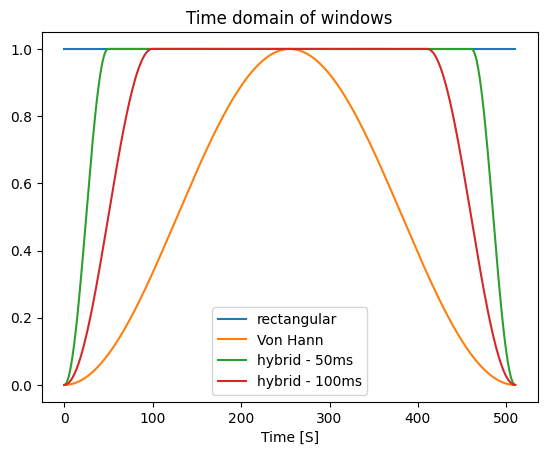

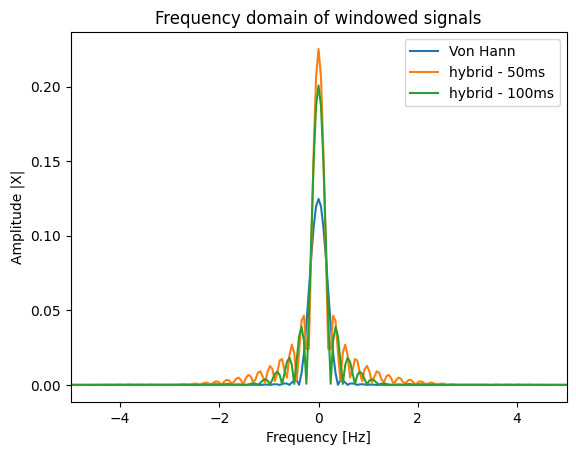

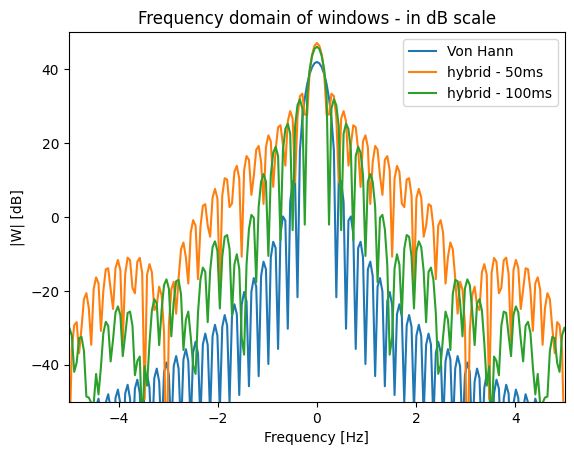

In [42]:
# Your code for window analysis goes here
r = np.ones_like(x2)
N = len(x2)
vh = np.hanning(N)
hy50 = np.concatenate((np.hanning(100)[:50],r[50:-50],np.hanning(100)[50:]))
hy100 = np.concatenate((np.hanning(200)[:100],r[100:-100],np.hanning(200)[100:]))

fig = plt.figure(); fig.clf()
axWindow = fig.add_subplot(111)
axWindow.plot(range(0,x2.size),r,range(0,x2.size),vh,range(0,x2.size),hy50,range(0,x2.size),hy100)
axWindow.set_title('Time domain of windows')
axWindow.set_xlabel('Time [S]')
axWindow.legend(['rectangular', 'Von Hann', 'hybrid - 50ms', 'hybrid - 100ms'])

vhp = np.concatenate((vh,np.zeros(len(vh)*3)))
VH,freqvh,ampvh = spectrum(vhp,fs,lim=[-50,50],plot=False)
hy50p = np.concatenate((hy50,np.zeros(len(hy50)*3)))
HY50,freqhy50,amphy50 = spectrum(hy50p,fs,lim=[-50,50],plot=False)
hy100p = np.concatenate((hy100,np.zeros(len(hy100)*3)))
HY100,freqhy100,amphy100 = spectrum(hy100p,fs,lim=[-50,50],plot=False)

fig = plt.figure(); fig.clf()
axSignal = fig.add_subplot(111)
axSignal.plot(freqvh,ampvh,freqhy50,amphy50,freqhy100,amphy100)
axSignal.set_xlim([-5,5])
axSignal.set_xlabel('Frequency [Hz]')
axSignal.set_ylabel('Amplitude |X|')
axSignal.set_title('Frequency domain of windowed signals')
axSignal.legend(['Von Hann', 'hybrid - 50ms', 'hybrid - 100ms'])

fig = plt.figure(); fig.clf()
axSignal = fig.add_subplot(111)
ampvh,amphy50,amphy100 = 20*np.log10(ampvh/0.001),20*np.log10(amphy50/0.001),20*np.log10(amphy100/0.001)
axSignal.plot(freqvh,ampvh,freqhy50,amphy50,freqhy100,amphy100)
axSignal.set_xlim([-5,5])
axSignal.set_ylim([-50,50])
axSignal.set_xlabel('Frequency [Hz]')
axSignal.set_ylabel('|W| [dB]')
axSignal.set_title('Frequency domain of windows - in dB scale')
axSignal.legend(['Von Hann', 'hybrid - 50ms', 'hybrid - 100ms'])


<div class="alert alert-success">
<span style="color:black">

    
Your answer/explanation here. Please do not remove the tags above and below. Use `Markdown` mode for this cell. 
    
<span style="color:blue">

A rectangular window captures the full signal without tapering the edges. The vonn Hann and hybrid methods will taper the signal at the edges. A down side of the vonn Hann method is that the signal is smeared out a lot. The Hybrid methods try to find a good compromise between this smearing out and tapering of the signal with the goal to maximalise the tapering at the edges and to minimalize a smeared out signal.
    
</span>
</div>    

We shall now verify our expectations regarding the effect of the windows by applying them to the previously generated signal of length $0.511\unit{s}$.

<div class="alert alert-info">
    
**Task** 

* Apply the generated windows to the signal $x_2$ you generated previously. Note: applying a window means multiplying the signal with the generated window.
* Plot the windowed time-domain signal and the corresponding frequency (amplitude) spectrum. In the spectrum plots, limit the x-axis of your figures to show content between -50 and 50 Hz. 
* Based on the plots, answer the following:
    * What is the benefit of applying a window to your signal before computing the DFT?
    * List one trade-off to consider when applying windowing to recorded signals
</div>


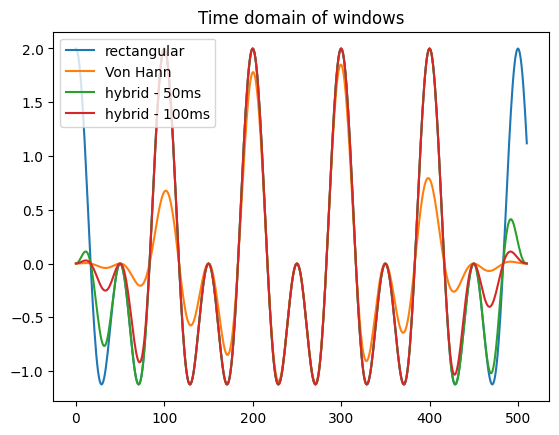

In [33]:
fig = plt.figure(); fig.clf()
axWindowSignal = fig.add_subplot(111)
axWindowSignal.plot(range(0,x2.size),r*x2,range(0,x2.size),vh*x2,range(0,x2.size),hy50*x2,range(0,x2.size),hy100*x2)
axWindowSignal.set_title('Time domain of windows')
axWindowSignal.legend(['rectangular', 'Von Hann', 'hybrid - 50ms', 'hybrid - 100ms'])

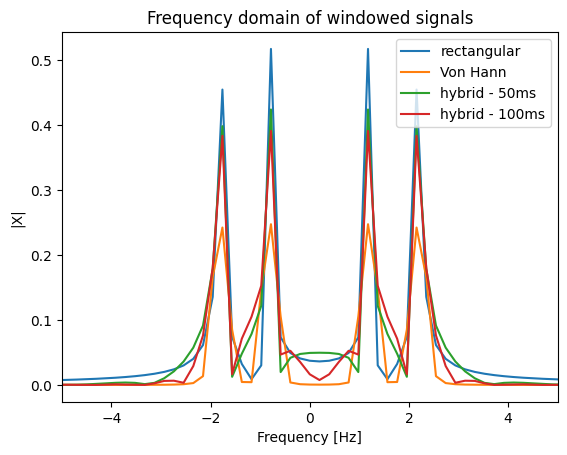

In [36]:
XR,freqxr,ampr = spectrum(x2*r,fs,lim=[-40,40],plot=False)
XVH,freqxvh,ampvh = spectrum(x2*vh,fs,lim=[-40,40],plot=False)
XHY50,freqxhy50,amphy50 = spectrum(x2*hy50,fs,lim=[-40,40],plot=False)
XHY100,freqxhy100,amphy100 = spectrum(x2*hy100,fs,lim=[-40,40],plot=False)

fig = plt.figure(); fig.clf()
axSignal = fig.add_subplot(111)
axSignal.plot(freqxr,ampr,freqxvh,ampvh,freqxhy50,amphy50,freqxhy100,amphy100)
axSignal.set_xlim([-5,5])
axSignal.set_xlabel('Frequency [Hz]')
axSignal.set_ylabel('|X|')
axSignal.set_title('Frequency domain of windowed signals')
axSignal.legend(['rectangular', 'Von Hann', 'hybrid - 50ms', 'hybrid - 100ms'])


<div class="alert alert-success">
<span style="color:black">

    
Your answer/explanation here. Please do not remove the tags above and below. Use `Markdown` mode for this cell. 
    
<span style="color:blue">

The benefit of applying a window is that high frequencies due to discontinuities at the edges of the signal are smeared out. This in cost of a usable part of the signal, i.e. at the edges the signal is completely changed.
    
</span>
</div>    